In [2]:
import pandas as pd
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
raw_variables = pd.read_csv("../Project3/final_feature_selection_btu.csv")
raw_variables.loc[~(raw_variables==0).all(axis=1)]
y = raw_variables[['TOTALBTU']].values
x = raw_variables[['TOTHSQFT']].values

raw_variables[['TOTALBTU', 'TOTHSQFT']]

,TOTALBTU,TOTHSQFT
0,156762.000,2395
1,123042.000,2437
2,19192.000,0
3,922899.000,5685
4,31187.000,0
5,14849.000,0
6,20380.000,0
7,27504.000,0
8,169160.000,1041
9,35603.000,1022


In [4]:
Nc = range(1, 20)

kmeans = [KMeans(n_clusters=i) for i in Nc]

kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max

In [5]:
score = [kmeans[i].fit(y).score(y) for i in range(len(kmeans))]

score

[-1.6577401163994673e+19,
 -9.053862131169609e+17,
 -2.0925033578586822e+17,
 -77741502864605.28,
 -38031314507233.82,
 -27100873101518.867,
 -21676839365683.86,
 -16116593477750.541,
 -13690278980662.646,
 -11566707205279.758,
 -9919996920588.06,
 -9063710695480.588,
 -7870576268404.702,
 -6939398660131.853,
 -6386829685446.834,
 -5642645903583.858,
 -4985604397792.166,
 -4518864367659.376,
 -4190711303422.28]

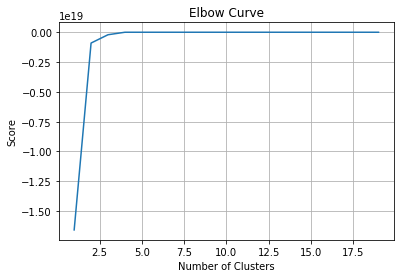

In [6]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.grid()
plt.savefig('C:/Users/justi/Desktop/homework/Project3/dataforfinalproject/Pictures/KMEANSelbow.png')
pl.show()

In [7]:
pca = PCA(n_components=1).fit(y)

pca_d = pca.transform(y)

pca_c = pca.transform(x)

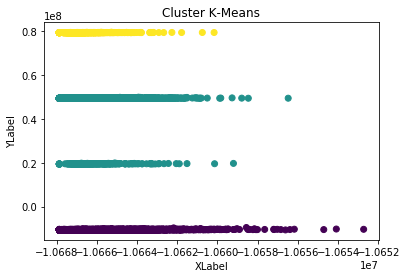

In [8]:
kmeans=KMeans(n_clusters=3)

kmeansoutput=kmeans.fit(y)

kmeansoutput
labels = kmeansoutput.labels_
pl.figure('Cluster Output K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('XLabel')

pl.ylabel('YLabel')

pl.title('Cluster K-Means')

pl.show()


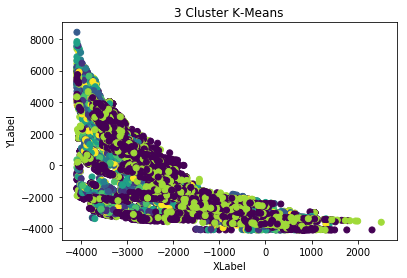

In [35]:
kmeans=KMeans(n_clusters=8)

kmeansoutput=kmeans.fit(y)

kmeansoutput
labels = kmeansoutput.labels_
pl.figure('Cluster Output K-Means')

pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)

pl.xlabel('XLabel')

pl.ylabel('YLabel')

pl.title('8 Cluster K-Means')

pl.show()
